In [1]:
# STANDARDS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# CUFFLINKS & PLOTLY
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_excel(r'C:\Users\krunk\OneDrive\Documents\CPSC 589\Dataset\BBS Dataset.xlsx',sheet_name='ReData')
df.head()

,Patient's Age,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Item 13,Item 14,BBS Sum,Assessment of Risk
0,97,1,0,1,1,1,0,0,1,1,0,0,0,1,1,8,HIGH
1,88,2,0,1,4,3,2,2,3,4,0,1,0,4,4,30,MEDIUM
2,73,3,4,3,2,2,0,2,3,1,0,1,2,4,3,30,MEDIUM
3,77,2,3,1,0,4,4,2,0,1,1,0,2,3,1,24,MEDIUM
4,65,3,4,1,4,4,2,4,4,2,1,2,3,3,4,41,LOW


<AxesSubplot:xlabel='Assessment of Risk', ylabel='count'>

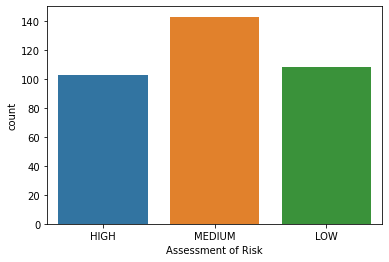

In [4]:
sns.countplot(data=df,x='Assessment of Risk')

In [5]:
df['Assessment of Risk'].iplot(kind='hist',color='blue')

<AxesSubplot:xlabel="Patient's Age", ylabel='Count'>

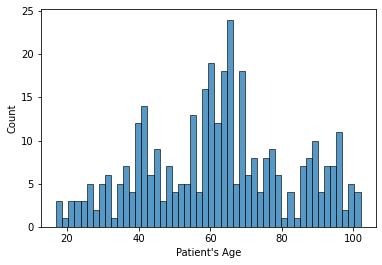

In [6]:
sns.histplot(df['Patient\'s Age'],bins=50)

In [7]:
# CONVERTING CATEGORICAL LABELS
"""rof = pd.get_dummies(df['Assessment of Risk'],drop_first=True)
df.drop('Assessment of Risk',axis=1,inplace=True)
df = pd.concat([df,rof],axis=1)
df.head()"""

"rof = pd.get_dummies(df['Assessment of Risk'],drop_first=True)\ndf.drop('Assessment of Risk',axis=1,inplace=True)\ndf = pd.concat([df,rof],axis=1)\ndf.head()"

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
rs = 3717

In [10]:
# ALL ITEMS INCLUDED

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Patient\'s Age','BBS Sum','Assessment of Risk'],axis=1), 
                                                    df['Assessment of Risk'], test_size=0.30, 
                                                    random_state=rs)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=10000)
logmodel.fit(X_train,y_train)
y_predict = logmodel.predict(X_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
print(confusion_matrix(y_test,y_predict,labels=['LOW','MEDIUM','HIGH']))
print(classification_report(y_test,y_predict,labels=['LOW','MEDIUM','HIGH']))

[[39  0  0]
 [ 0 36  1]
 [ 0  0 31]]
              precision    recall  f1-score   support

         LOW       1.00      1.00      1.00        39
      MEDIUM       1.00      0.97      0.99        37
        HIGH       0.97      1.00      0.98        31

    accuracy                           0.99       107
   macro avg       0.99      0.99      0.99       107
weighted avg       0.99      0.99      0.99       107



In [16]:
# HIGH CORR TOP 4 PICKED 9,11,10,5 (4 TOTAL ITEMS)

In [17]:
e_text = 'HIGH CORR TOP 4 PICKED 9,11,10,5 (4 TOTAL ITEMS)'
Xe_train, Xe_test, ye_train, ye_test = train_test_split(df[['Item 5','Item 9','Item 10','Item 11']], 
                                                    df['Assessment of Risk'], test_size=0.30, 
                                                    random_state=rs)
logmodele = LogisticRegression(solver='lbfgs', max_iter=10000)
logmodele.fit(Xe_train,ye_train)
ye_predict = logmodele.predict(Xe_test)
print(confusion_matrix(ye_test,ye_predict,labels=['LOW','MEDIUM','HIGH']))
print(classification_report(ye_test,ye_predict,labels=['LOW','MEDIUM','HIGH']))

[[38  1  0]
 [ 6 31  0]
 [ 0  2 29]]
              precision    recall  f1-score   support

         LOW       0.86      0.97      0.92        39
      MEDIUM       0.91      0.84      0.87        37
        HIGH       1.00      0.94      0.97        31

    accuracy                           0.92       107
   macro avg       0.93      0.92      0.92       107
weighted avg       0.92      0.92      0.92       107



In [18]:
# HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS)

In [19]:
Xa_train, Xa_test, ya_train, ya_test = train_test_split(df[['Item 5','Item 8','Item 9','Item 10','Item 11']], 
                                                    df['Assessment of Risk'], test_size=0.30, 
                                                    random_state=rs)
logmodela = LogisticRegression(solver='lbfgs', max_iter=10000)
logmodela.fit(Xa_train,ya_train)
ya_predict = logmodela.predict(Xa_test)
print(confusion_matrix(ya_test,ya_predict,labels=['LOW','MEDIUM','HIGH']))
print(classification_report(ya_test,ya_predict,labels=['LOW','MEDIUM','HIGH']))

[[39  0  0]
 [ 1 35  1]
 [ 0  0 31]]
              precision    recall  f1-score   support

         LOW       0.97      1.00      0.99        39
      MEDIUM       1.00      0.95      0.97        37
        HIGH       0.97      1.00      0.98        31

    accuracy                           0.98       107
   macro avg       0.98      0.98      0.98       107
weighted avg       0.98      0.98      0.98       107



In [20]:
# HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL ITEMS)

In [21]:
Xb_train, Xb_test, yb_train, yb_test = train_test_split(df[['Item 5','Item 7','Item 8','Item 9','Item 10','Item 11']], 
                                                    df['Assessment of Risk'], test_size=0.30, 
                                                    random_state=rs)
logmodelb = LogisticRegression(solver='lbfgs', max_iter=10000)
logmodelb.fit(Xb_train,yb_train)
yb_predict = logmodelb.predict(Xb_test)
print(confusion_matrix(yb_test,yb_predict,labels=['LOW','MEDIUM','HIGH']))
print(classification_report(yb_test,yb_predict,labels=['LOW','MEDIUM','HIGH']))

[[39  0  0]
 [ 0 36  1]
 [ 0  0 31]]
              precision    recall  f1-score   support

         LOW       1.00      1.00      1.00        39
      MEDIUM       1.00      0.97      0.99        37
        HIGH       0.97      1.00      0.98        31

    accuracy                           0.99       107
   macro avg       0.99      0.99      0.99       107
weighted avg       0.99      0.99      0.99       107



In [22]:
# DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS)

In [23]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(df[['Item 4','Item 8','Item 10','Item 11','Item 12','Item 14']], 
                                                    df['Assessment of Risk'], test_size=0.30, 
                                                    random_state=rs)
logmodelc = LogisticRegression(solver='lbfgs', max_iter=10000)
logmodelc.fit(Xc_train,yc_train)
yc_predict = logmodelc.predict(Xc_test)
print(confusion_matrix(yc_test,yc_predict,labels=['LOW','MEDIUM','HIGH']))
print(classification_report(yc_test,yc_predict,labels=['LOW','MEDIUM','HIGH']))

[[39  0  0]
 [ 2 33  2]
 [ 0  1 30]]
              precision    recall  f1-score   support

         LOW       0.95      1.00      0.97        39
      MEDIUM       0.97      0.89      0.93        37
        HIGH       0.94      0.97      0.95        31

    accuracy                           0.95       107
   macro avg       0.95      0.95      0.95       107
weighted avg       0.95      0.95      0.95       107



In [24]:
# HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL ITEMS)

In [25]:
Xd_train, Xd_test, yd_train, yd_test = train_test_split(df[['Item 5','Item 6','Item 7','Item 8','Item 9','Item 10','Item 11']], 
                                                    df['Assessment of Risk'], test_size=0.30, 
                                                    random_state=rs)
logmodeld = LogisticRegression(solver='lbfgs', max_iter=10000)
logmodeld.fit(Xd_train,yd_train)
yd_predict = logmodeld.predict(Xd_test)
print(confusion_matrix(yd_test,yd_predict,labels=['LOW','MEDIUM','HIGH']))
print(classification_report(yd_test,yd_predict,labels=['LOW','MEDIUM','HIGH']))

[[39  0  0]
 [ 0 36  1]
 [ 0  0 31]]
              precision    recall  f1-score   support

         LOW       1.00      1.00      1.00        39
      MEDIUM       1.00      0.97      0.99        37
        HIGH       0.97      1.00      0.98        31

    accuracy                           0.99       107
   macro avg       0.99      0.99      0.99       107
weighted avg       0.99      0.99      0.99       107



In [26]:
# HIGH CORR TOP 8 PICKED 9,11,10,5,8,7,6,12 (8 TOTAL ITEMS)

In [27]:
f_text = 'HIGH CORR TOP 8 PICKED 9,11,10,5,8,7,6,12 (8 TOTAL ITEMS)'
Xf_train, Xf_test, yf_train, yf_test = train_test_split(df[['Item 5','Item 6','Item 7','Item 8','Item 9','Item 10','Item 11','Item 12']], 
                                                    df['Assessment of Risk'], test_size=0.30, 
                                                    random_state=rs)
logmodelf = LogisticRegression(solver='lbfgs', max_iter=10000)
logmodelf.fit(Xf_train,yf_train)
yf_predict = logmodelf.predict(Xf_test)
print(confusion_matrix(yf_test,yf_predict,labels=['LOW','MEDIUM','HIGH']))
print(classification_report(yf_test,yf_predict,labels=['LOW','MEDIUM','HIGH']))

[[39  0  0]
 [ 0 36  1]
 [ 0  0 31]]
              precision    recall  f1-score   support

         LOW       1.00      1.00      1.00        39
      MEDIUM       1.00      0.97      0.99        37
        HIGH       0.97      1.00      0.98        31

    accuracy                           0.99       107
   macro avg       0.99      0.99      0.99       107
weighted avg       0.99      0.99      0.99       107



In [28]:
# HIGH CORR TOP 9 PICKED 9,11,10,5,8,7,6,12,13 (9 TOTAL ITEMS)

In [29]:
g_text = 'HIGH CORR TOP 9 PICKED 9,11,10,5,8,7,6,12,13 (9 TOTAL ITEMS)'
Xg_train, Xg_test, yg_train, yg_test = train_test_split(df[['Item 5','Item 6','Item 7','Item 8','Item 9','Item 10','Item 11','Item 12','Item 13']], 
                                                    df['Assessment of Risk'], test_size=0.30, 
                                                    random_state=rs)
logmodelg = LogisticRegression(solver='lbfgs', max_iter=10000)
logmodelg.fit(Xg_train,yg_train)
yg_predict = logmodelg.predict(Xg_test)
print(confusion_matrix(yg_test,yg_predict,labels=['LOW','MEDIUM','HIGH']))
print(classification_report(yg_test,yg_predict,labels=['LOW','MEDIUM','HIGH']))

[[37  2  0]
 [ 0 36  1]
 [ 0  0 31]]
              precision    recall  f1-score   support

         LOW       1.00      0.95      0.97        39
      MEDIUM       0.95      0.97      0.96        37
        HIGH       0.97      1.00      0.98        31

    accuracy                           0.97       107
   macro avg       0.97      0.97      0.97       107
weighted avg       0.97      0.97      0.97       107



In [30]:
# HIGH CORR TOP 10 PICKED 9,11,10,5,8,7,6,12,13,4 (10 TOTAL ITEMS)

In [31]:
h_text = 'HIGH CORR TOP 10 PICKED 9,11,10,5,8,7,6,12,13,4 (10 TOTAL ITEMS)'
Xh_train, Xh_test, yh_train, yh_test = train_test_split(df[['Item 4','Item 5','Item 6','Item 7','Item 8','Item 9','Item 10','Item 11','Item 12','Item 13']], 
                                                    df['Assessment of Risk'], test_size=0.30, 
                                                    random_state=rs)
logmodelh = LogisticRegression(solver='lbfgs', max_iter=10000)
logmodelh.fit(Xh_train,yh_train)
yh_predict = logmodelh.predict(Xh_test)
print(confusion_matrix(yh_test,yh_predict,labels=['LOW','MEDIUM','HIGH']))
print(classification_report(yh_test,yh_predict,labels=['LOW','MEDIUM','HIGH']))

[[38  1  0]
 [ 0 36  1]
 [ 0  0 31]]
              precision    recall  f1-score   support

         LOW       1.00      0.97      0.99        39
      MEDIUM       0.97      0.97      0.97        37
        HIGH       0.97      1.00      0.98        31

    accuracy                           0.98       107
   macro avg       0.98      0.98      0.98       107
weighted avg       0.98      0.98      0.98       107



In [32]:
ex1 = pd.concat([pd.DataFrame(confusion_matrix(y_test,y_predict,labels=['LOW','MEDIUM','HIGH']),index=['LOW','MEDIUM','HIGH'],columns=['LOW','MEDIUM','HIGH']),
pd.DataFrame(classification_report(y_test,y_predict,labels=['LOW','MEDIUM','HIGH'],output_dict=True)).transpose()],axis=1)
ex1.set_index([['Original','Original','Original','Original','Original','Original'],ex1.index],inplace=True)

ex2 = pd.concat([pd.DataFrame(confusion_matrix(ya_test,ya_predict,labels=['LOW','MEDIUM','HIGH']),index=['LOW','MEDIUM','HIGH'],columns=['LOW','MEDIUM','HIGH']),
pd.DataFrame(classification_report(ya_test,ya_predict,labels=['LOW','MEDIUM','HIGH'],output_dict=True)).transpose()],axis=1)
ex2.set_index([['HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS)','HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS)','HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS)','HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS)','HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS)','HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS)'],ex2.index],inplace=True)

ex3 = pd.concat([pd.DataFrame(confusion_matrix(yb_test,yb_predict,labels=['LOW','MEDIUM','HIGH']),index=['LOW','MEDIUM','HIGH'],columns=['LOW','MEDIUM','HIGH']),
pd.DataFrame(classification_report(yb_test,yb_predict,labels=['LOW','MEDIUM','HIGH'],output_dict=True)).transpose()],axis=1)
ex3.set_index([['HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL ITEMS)','HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL ITEMS)','HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL ITEMS)','HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL ITEMS)','HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL ITEMS)','HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL ITEMS)'],ex3.index],inplace=True)

ex4 = pd.concat([pd.DataFrame(confusion_matrix(yc_test,yc_predict,labels=['LOW','MEDIUM','HIGH']),index=['LOW','MEDIUM','HIGH'],columns=['LOW','MEDIUM','HIGH']),
pd.DataFrame(classification_report(yc_test,yc_predict,labels=['LOW','MEDIUM','HIGH'],output_dict=True)).transpose()],axis=1)
ex4.set_index([['DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS)','DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS)','DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS)','DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS)','DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS)','DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS)'],ex4.index],inplace=True)

ex5 = pd.concat([pd.DataFrame(confusion_matrix(yd_test,yd_predict,labels=['LOW','MEDIUM','HIGH']),index=['LOW','MEDIUM','HIGH'],columns=['LOW','MEDIUM','HIGH']),
pd.DataFrame(classification_report(yd_test,yd_predict,labels=['LOW','MEDIUM','HIGH'],output_dict=True)).transpose()],axis=1)
ex5.set_index([['HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL ITEMS)','HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL ITEMS)','HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL ITEMS)','HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL ITEMS)','HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL ITEMS)','HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL ITEMS)'],ex5.index],inplace=True)

ex6 = pd.concat([pd.DataFrame(confusion_matrix(ye_test,ye_predict,labels=['LOW','MEDIUM','HIGH']),index=['LOW','MEDIUM','HIGH'],columns=['LOW','MEDIUM','HIGH']),
pd.DataFrame(classification_report(ye_test,ye_predict,labels=['LOW','MEDIUM','HIGH'],output_dict=True)).transpose()],axis=1)
ex6.set_index([[e_text,e_text,e_text,e_text,e_text,e_text],ex6.index],inplace=True)

ex7 = pd.concat([pd.DataFrame(confusion_matrix(yf_test,yf_predict,labels=['LOW','MEDIUM','HIGH']),index=['LOW','MEDIUM','HIGH'],columns=['LOW','MEDIUM','HIGH']),
pd.DataFrame(classification_report(yf_test,yf_predict,labels=['LOW','MEDIUM','HIGH'],output_dict=True)).transpose()],axis=1)
ex7.set_index([[f_text,f_text,f_text,f_text,f_text,f_text],ex7.index],inplace=True)

ex8 = pd.concat([pd.DataFrame(confusion_matrix(yg_test,yg_predict,labels=['LOW','MEDIUM','HIGH']),index=['LOW','MEDIUM','HIGH'],columns=['LOW','MEDIUM','HIGH']),
pd.DataFrame(classification_report(yg_test,yg_predict,labels=['LOW','MEDIUM','HIGH'],output_dict=True)).transpose()],axis=1)
ex8.set_index([[g_text,g_text,g_text,g_text,g_text,g_text],ex8.index],inplace=True)

ex9 = pd.concat([pd.DataFrame(confusion_matrix(yh_test,yh_predict,labels=['LOW','MEDIUM','HIGH']),index=['LOW','MEDIUM','HIGH'],columns=['LOW','MEDIUM','HIGH']),
pd.DataFrame(classification_report(yh_test,yh_predict,labels=['LOW','MEDIUM','HIGH'],output_dict=True)).transpose()],axis=1)
ex9.set_index([[h_text,h_text,h_text,h_text,h_text,h_text],ex9.index],inplace=True)

finalex = pd.concat([ex1,ex6,ex2,ex3,ex4,ex5,ex7,ex8,ex9])
finalex

LOW  MEDIUM  \
Original                                           LOW           39.0     0.0   
                                                   MEDIUM         0.0    36.0   
                                                   HIGH           0.0     0.0   
                                                   accuracy       NaN     NaN   
                                                   macro avg      NaN     NaN   
                                                   weighted avg   NaN     NaN   
HIGH CORR TOP 4 PICKED 9,11,10,5 (4 TOTAL ITEMS)   LOW           38.0     1.0   
                                                   MEDIUM         6.0    31.0   
                                                   HIGH           0.0     2.0   
                                                   accuracy       NaN     NaN   
                                                   macro avg      NaN     NaN   
                                                   weighted avg   NaN     NaN   
HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS) LOW           39.0     0.0   
                                                   MEDIUM         1.0    35.0   
                                                   HIGH           0.0     0.0   
                                                   accuracy       NaN     NaN   
                                                   macro avg      NaN     NaN   
                                                   weighted avg   NaN     NaN   
HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL I... LOW           39.0     0.0   
                                                   MEDIUM         0.0    36.0   
                                                   HIGH           0.0     0.0   
                                                   accuracy       NaN     NaN   
                                                   macro avg      NaN     NaN   
                                                   weighted avg   NaN     NaN   
DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS)  LOW           39.0     0.0   
                                                   MEDIUM         2.0    33.0   
                                                   HIGH           0.0     1.0   
                                                   accuracy       NaN     NaN   
                                                   macro avg      NaN     NaN   
                                                   weighted avg   NaN     NaN   
HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL... LOW           39.0     0.0   
                                                   MEDIUM         0.0    36.0   
                                                   HIGH           0.0     0.0   
                                                   accuracy       NaN     NaN   
                                                   macro avg      NaN     NaN   
                                                   weighted avg   NaN     NaN   
HIGH CORR TOP 8 PICKED 9,11,10,5,8,7,6,12 (8 TO... LOW           39.0     0.0   
                                                   MEDIUM         0.0    36.0   
                                                   HIGH           0.0     0.0   
                                                   accuracy       NaN     NaN   
                                                   macro avg      NaN     NaN   
                                                   weighted avg   NaN     NaN   
HIGH CORR TOP 9 PICKED 9,11,10,5,8,7,6,12,13 (9... LOW           37.0     2.0   
                                                   MEDIUM         0.0    36.0   
                                                   HIGH           0.0     0.0   
                                                   accuracy       NaN     NaN   
                                                   macro avg      NaN     NaN   
                                                   weighted avg   NaN     NaN   
HIGH CORR TOP 10 PICKED 9,11,10,5,8,7,6,12,13,4... LOW           38.0     1.0   
                

In [33]:
finalex.to_excel(r'C:\Users\krunk\OneDrive\Documents\CPSC 597\Project Data\BBS Machine Learning Data Collection (Logistic Regression).xlsx',sheet_name='Logistic Regression')